텍스트를 표현하는 방법은 앞서 배운 n-gram이 있다 ( Ch3 에서 배운것) 

그러나!! 머신 러닝 등의 알고리즘이 적용된 본격적인 자연어 처리 --> 문자를 수치화할 필요가 있다.

# 1) 다양한 단어의 표현 방법

### 1. 단어의 표현 방법

- 국소 표현 방법 : 각 단어에 1번 2번 3번 과 같은 숫자를 맵핑하는 방법 (이산 표현이라고도 한다)
- 분산 표현 방법 : 해당 단어를 표현하기 위해 주변 단어를 참고한다. ex) puppy 라는 단어 근처에는 주로 cute, lovely 라는 단어가 자주 등장 (연속 표현이라고도 한다.)

### 2. 단어 표현의 카테고리화

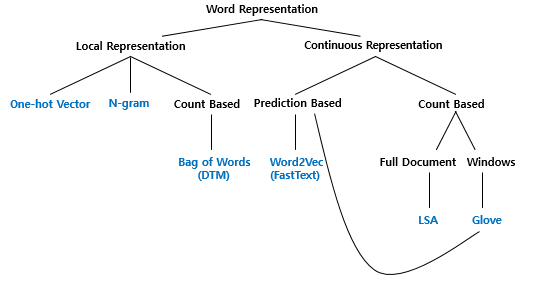

# 2) Bag of Words(BoW)

단어의 등장 순서를 고려하지 않는 빈도수 기반의 단어 표현 방법인 Bag of Words !!

### 1. Bag of Words란?

단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도에만 집중하는 텍스트 데이터

BoW를 만드는 과정
-  각 단어에 고유한 정수 인덱스를 부여합니다.
- 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.


##### 한국어 예제를 통해서 BoW에 대해서 이해해보도록 해보자

In [1]:
from konlpy.tag import Okt
import re  
okt=Okt()  

# 문서 1 :  정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다
token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [2]:
bow # 중복되는 단어의 개수가 몇 개 있는지 나타내는 리스트

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

### 2. Bag of Words의 다른 예제들

문서 2: 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다. 를 BoW를 만들고 위의 문서1 과 문서2 를 합쳐서 BoW 를 만들어보자

문서3: 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.

BoW 는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법 -> 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰인다. 즉 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 쓰인다. 
#### 예를 들어 '미분' '방정식' '부등식' 과 같은 단어가 자주 등장하면 수학 관련 문서!!

### 3. CounterVectorizer 클래스로 BoW 만들기

사이킷 런에서는 단어의 빈도를 Count하여 Vector롤 만드는 CountVectorizer 클래스를 지원한다. 

길이가 2 이상인 문자만 토큰으로 인식한다.

그러나 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


# 3) 문서 단어 행렬(Document-Term Matrix, DTM)

### 1. 문서 단어 행렬(Document-Term Matrix, DTM)의 표기법

BoW와 다른 표현 방법이 아니라 BoW 표현을 다수의 문서에 대해서 행렬로 표현하고 부르는 용어입니다.

- 문서1 : 먹고 싶은 사과
- 문서2 : 먹고 싶은 바나나
- 문서3 : 길고 노란 바나나 바나나
- 문서4 : 저는 과일이 좋아요

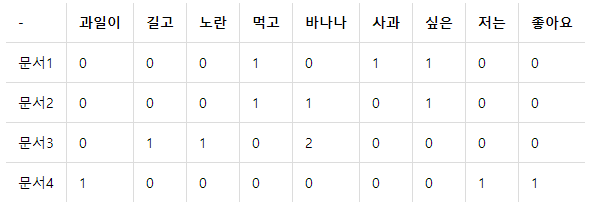

## 2. 문서 단어 행렬의 한계

### 1) 희소 표현

대부분의 0이 되기 때문에 공간적 낭비와 계산 리소를 증가시킬 수 있다. 

### 2) 단순 빈도 수 기반 접근

단순 빈도 수 로 접근하였을 때 불용어인 the 는 어느 문서에든 많이 나올 수 있으므로 그 두 문서를 유사한 문서라 할 수 없다!! --> 불용어와 중요한 단어에 대해서 가중치를 줄 수 있는 방법이 없을까??? --> TF-IDF 

# 4) TF-IDF(Term Frequency-Inverse Document Frequency)

### 1. TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)

 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다. 사용 방법은 우선 DTM을 만든 후, TF-IDF 가중치를 부여!
 
##### 문서의 유사도를 구하는 작업,  검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있다.

TF-IDF는 TF와 IDF를 곱한 값을 의미한다 !  문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현해보자

#### (1) tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수 

앞에서 한 것과 같다

#### (2) df(t) : 특정 단어 t가 등장한 문서의 수

문서들에서 몇 번 등장했는지는 관심없고 몇 개의 문서에 등장했는지만 관심있음

#### (3) idf(d, t) :df(t) 에 반비레하는 수

idf(d,t)=log(n/(1+df(t))) // 작을 수록 많이 등장하는 것 (큰 값이 중요도가 더 높음!)

log를 씌우는 이유 : 그냥 역수를 취하면 n 이 커졌을 경우 기하급수적으로 수가 커진다.

+1을 하는 이유 : 아무것도 없을 때 분모에 0 이 되는 것을 막기위해



### TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다.  TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다


# 파이썬으로 TF-IDF 직접 구현하기

In [4]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [5]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [6]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147
